In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
earthquake = pd.read_csv('earthquakes.csv', index_col = 'date', parse_dates=True)

In [16]:
amazon = pd.read_csv('amazon_close.csv',index_col = 'date', parse_dates=True)

# 1. ARIMA MODEL

Exercise 1.

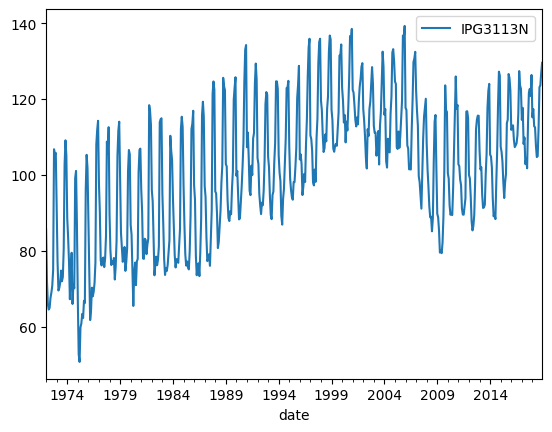

In [11]:
# Load in the time series
candy = pd.read_csv('candy_production.csv',
                 index_col='date',
                 parse_dates=True)

# Plot and show the time series on axis ax
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

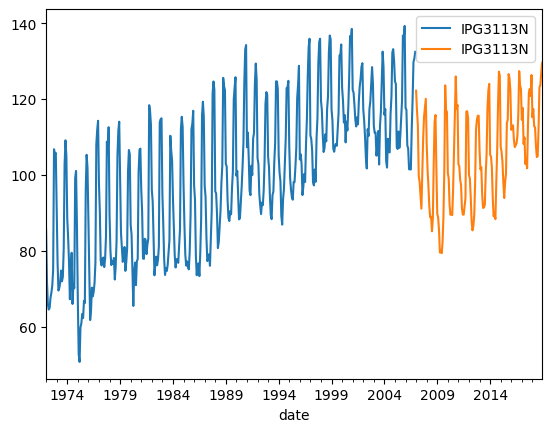

In [12]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()



다운로드.svg

Q1 : The top plot shown is a time series of Amazon stock close price.
Is the stock close price stationary?

Q2 : The middle plot shown is a time series of the return (percentage increase of price per day) of Amazon stock.

Q3 : The bottom plot is a time series of the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

Is the number of major earthquakes per year stationary?

sol1 : No, the top plot has a trend

sol2 : No, in the middle plot, the variance changes with time

sol3 : Yes, the bottom plot appears to be stationary

Exercise 2

In [13]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4])

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


Augmented Dickey-Fuller test(ADF)

결과값 해석

1. adf : test statistic
2. p-value : MacKinnon's approximate p-value

MacKinnon's approximate p-value : ADF는 ordinary least squares regression estimates 이용. 이때, ADF에서 사용되는 통계량의 분포는 브라운운동과 관련된 복잡한 형태로, 해당 누적확률분포와 관련된 값.
(시계열 분석 강의, 4주차 3단원, 단위근검정 파트 참고)

3. usedlag : number of lags used
4. nobs : number of obs used for ADF regression and calculation of the critical values
5. critical values
6. icbest : maximized information criterion if autolag is not None

* autolag : "AIC","BIC","t-stat",None으로 함수 내 정의 가능

AIC가 default

AIC, BIC -> number of lags ia chosen to minimized the corresponding information criterion

t-stat : based choice of maxlag , Starts with maxlag and drops a lag until the t-statistic on the last lag length is significant using a 5%-sized test.

None : the number of included lags is set to maxlag.

출처 : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html


In [ ]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

1.svg

ADF Statistic: -6.433646032918734
p-value: 1.6734498510401136e-08

In [17]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811288, 2.3312717254865773e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [18]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])

#log transform으로인해 much more negative test statistic -> log-return transformation is better라고 적혀있으나 동일한 값 .. ? ?

(-7.203579488811288, 2.3312717254865773e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


Exercise 3

각 ar_coefs, ma_coefs print하여 차수 해석 및 차수에 해당하는 계수 해석이므로 생략.

Text(0.5, 0, '$t$')

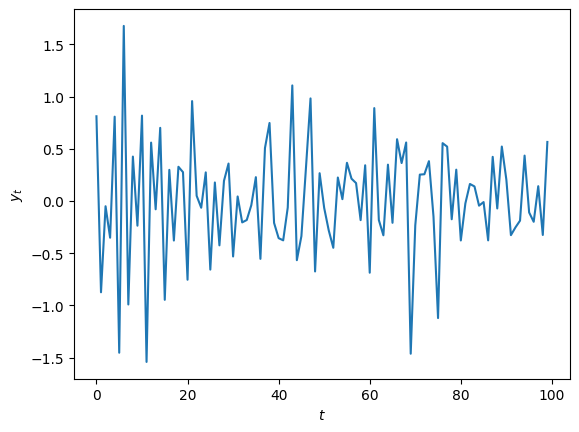

In [19]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')

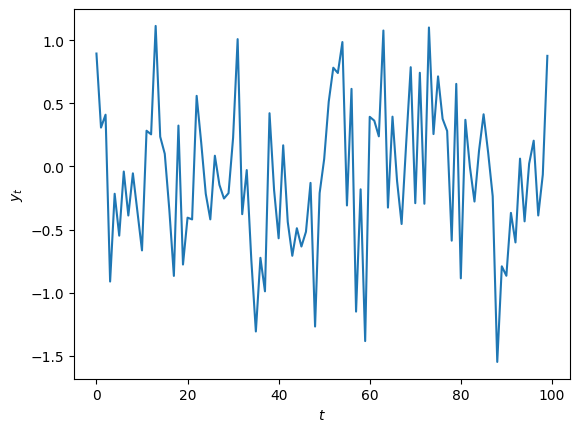

In [7]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [8]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()